In [1]:
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy import units as u 
from astropy.cosmology import z_at_value, Planck18

A representative sample of the local LIRG population is found by determining the redshift up to which
the least luminous LIRG, i.e. $L_{\mathrm{IR}} = 10^{11} L_{\odot}$, can be observed, given the RBGS sensitivity $f_{60}$ = 5.24 Jy. To compute this redshift, the observed correlation between $f_{60}$ and the total IR flux $F_{\mathrm{IR}} = L_{\mathrm{IR}} / 4 \pi D^2_L $ of the RBGS LIRGs is fitted.


To determine $F_{\mathrm{IR}}$ that corresponds with $f_{60} = 5.24$ Jy, we perform a log-linear fit on the $f_{60}$ and $F_{\mathrm{IR}}$ catalog data of the form 

$\log_{10}\left(\frac{f_{60}}{\mathrm{Jy}}\right) = a \log_{10}\left(\frac{F_{\mathrm{IR}}}{\mathrm{W m^{-2}}}\right) + b$

In [2]:
flux_densities = np.loadtxt("RBGS_fi.txt")
f60_unc = np.loadtxt("f60_i_unc.txt")*1e-3
f60_unc_no1068 = np.delete(f60_unc,24)


def func(x,a,b): return a*x+b

In [3]:
def Fir(f12,f25,f60,f100): return 1.8e-14*(13.48*f12+ 5.16*f25+2.58*f60+f100)

Fir_RBGS = np.array([Fir(i[0],i[1],i[2],i[3]) for i in flux_densities] )
print(len(Fir_RBGS))
Fir_RBGS_no1068 = np.delete(Fir_RBGS, 24)
print(len(Fir_RBGS))

f60_density = np.array([i[2] for i in flux_densities])
print(len(f60_density))
f60_density_no1068 = np.delete(f60_density, 24)
print(len(f60_density))

testi = abs(np.array([np.log10(i+j)-np.log10(i) for i,j in zip(f60_density,f60_unc)]))
popt1, pcov1 = curve_fit(func, np.log10(Fir_RBGS), np.log10(f60_density), sigma  = f60_unc/(np.log(10)*f60_density))
popt2, pcov2 = curve_fit(func, np.log10(Fir_RBGS), np.log10(f60_density))

unc_a1 = np.sqrt(np.diag(pcov1)[0])#with unc in fit procedure
unc_b1 = np.sqrt(np.diag(pcov1)[1])
unc_a2 = np.sqrt(np.diag(pcov2)[0])#without unc in fit procedure
unc_b2 = np.sqrt(np.diag(pcov2)[1])

popt1_no1068, pcov1_no1068 = curve_fit(func, np.log10(Fir_RBGS_no1068), np.log10(f60_density_no1068), sigma  = f60_unc_no1068/(np.log(10)*f60_density_no1068))
popt2_no1068, pcov2_no1068 = curve_fit(func, np.log10(Fir_RBGS_no1068), np.log10(f60_density_no1068))

unc_a1_no1068 = np.sqrt(np.diag(pcov1_no1068)[0])
unc_b1_no1068 = np.sqrt(np.diag(pcov1_no1068)[1])
unc_a2_no1068 = np.sqrt(np.diag(pcov2_no1068)[0])
unc_b2_no1068 = np.sqrt(np.diag(pcov2_no1068)[1])


182
182
182
182


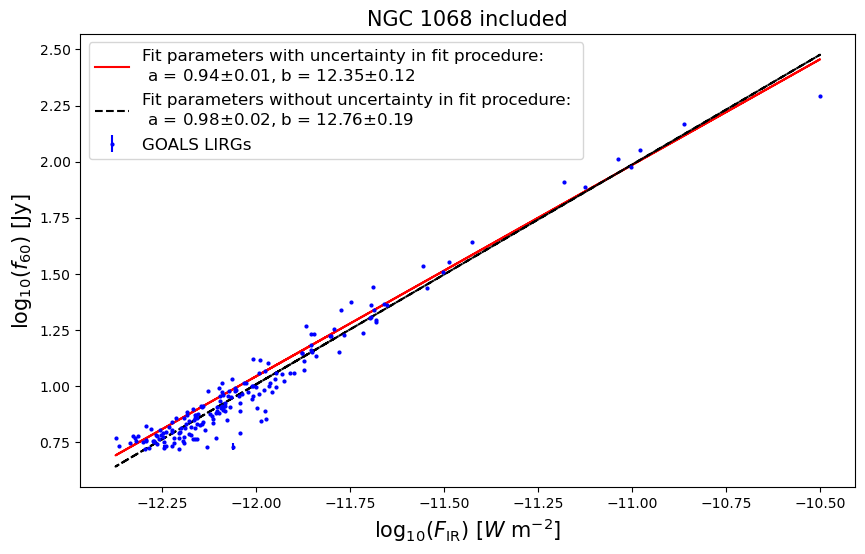

In [4]:

fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(np.log10(Fir_RBGS),np.log10(f60_density),xerr = None, yerr = f60_unc/(np.log(10)*f60_density), ls = "none", marker = 'o',color = 'blue',ms= 2, label = "GOALS LIRGs ")
plt.plot(np.log10(Fir_RBGS), func(np.log10(Fir_RBGS),popt1[0],popt1[1]), 
         label = 'Fit parameters with uncertainty in fit procedure: \n a = ' + str(round(popt1[0],2)) + '$ \pm $' + str(round(unc_a1,2)) +
         ', b = ' + str(round(popt1[1],2)) + '$ \pm $' +str(round(unc_b1,2)), color = 'red')
plt.plot(np.log10(Fir_RBGS), func(np.log10(Fir_RBGS),popt2[0],popt2[1]), 
         label = 'Fit parameters without uncertainty in fit procedure: \n a = ' + str(round(popt2[0],2)) + '$ \pm $' + str(round(unc_a2,2)) +
         ', b = ' + str(round(popt2[1],2)) + '$ \pm $' +str(round(unc_b2,2)), color = 'black',linestyle = '--')
plt.xlabel('$\log_{10}(F_{\mathrm{IR}})$ [$W$ m$^{-2}$]', fontsize = 15)
plt.ylabel('$\log_{10}(f_{60})$ [Jy]', fontsize = 15)
plt.title("NGC 1068 included", fontsize = 15)
plt.legend(fontsize = 12)

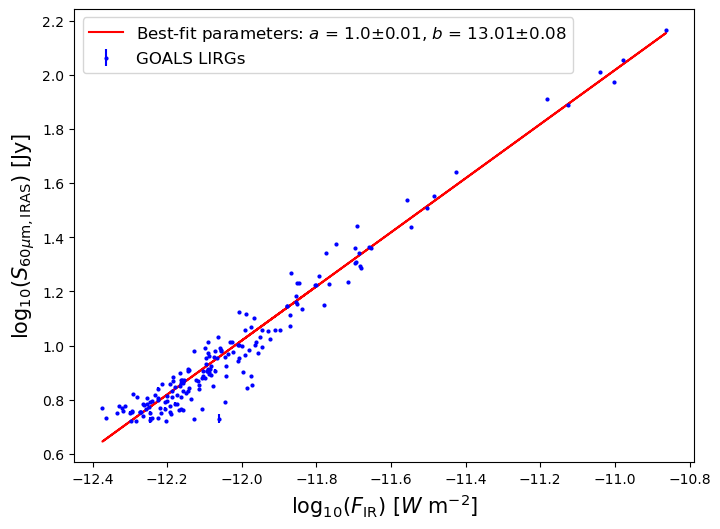

In [5]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(np.log10(Fir_RBGS_no1068),np.log10(f60_density_no1068),xerr = None, yerr = f60_unc_no1068/(np.log(10)*f60_density_no1068), ls = "none", marker = 'o',color = 'blue',ms= 2, label = "GOALS LIRGs ")
plt.plot(np.log10(Fir_RBGS_no1068), func(np.log10(Fir_RBGS_no1068),popt1_no1068[0],popt1_no1068[1]), 
         label = 'Best-fit parameters: $a$ = ' + str(round(popt1_no1068[0],2)) + '$ \pm $' + str(round(unc_a1_no1068,2)) +
         ', $b$ = ' + str(round(popt1_no1068[1],2)) + '$ \pm $' +str(round(unc_b1_no1068,2)), color = 'red')

plt.xlabel('$\log_{10}(F_{\mathrm{IR}})$ [$W$ m$^{-2}$]', fontsize = 15)
plt.ylabel('$\log_{10}(S_{60\mu\mathrm{m},\mathrm{IRAS}})$ [Jy]', fontsize = 15)
plt.legend(fontsize = 12)
#plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/completenessfit",bbox_inches="tight")


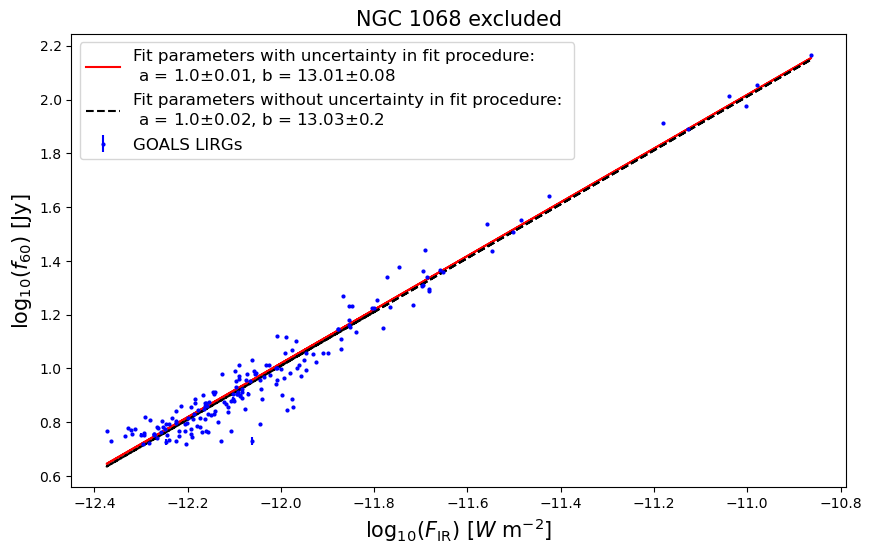

In [6]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(np.log10(Fir_RBGS_no1068),np.log10(f60_density_no1068),xerr = None, yerr = f60_unc_no1068/(np.log(10)*f60_density_no1068), ls = "none", marker = 'o',color = 'blue',ms= 2, label = "GOALS LIRGs ")
plt.plot(np.log10(Fir_RBGS_no1068), func(np.log10(Fir_RBGS_no1068),popt1_no1068[0],popt1_no1068[1]), 
         label = 'Fit parameters with uncertainty in fit procedure: \n a = ' + str(round(popt1_no1068[0],2)) + '$ \pm $' + str(round(unc_a1_no1068,2)) +
         ', b = ' + str(round(popt1_no1068[1],2)) + '$ \pm $' +str(round(unc_b1_no1068,2)), color = 'red')

plt.plot(np.log10(Fir_RBGS_no1068), func(np.log10(Fir_RBGS_no1068),popt2_no1068[0],popt2_no1068[1]), 
         label = 'Fit parameters without uncertainty in fit procedure: \n a = ' + str(round(popt2_no1068[0],2)) + '$ \pm $' + str(round(unc_a2_no1068,2)) +
         ', b = ' + str(round(popt2_no1068[1],2)) + '$ \pm $' +str(round(unc_b2_no1068,2)), color = 'black',linestyle = '--')

plt.title('NGC 1068 excluded', fontsize = 15)
plt.xlabel('$\log_{10}(F_{\mathrm{IR}})$ [$W$ m$^{-2}$]', fontsize = 15)
plt.ylabel('$\log_{10}(f_{60})$ [Jy]', fontsize = 15)
plt.legend(fontsize = 12)

In [7]:
def Complete(f60_i, LIR_i,a,b):
    f60_threshold = f60_i
    LIR_threshold = pow(10,LIR_i)*3.82e26
    expo = pow(a,-1)*np.log10(f60_threshold)-(b/a)
    dl = np.sqrt((pow(10,-expo)*LIR_threshold)/(4*np.pi))
    dl_Mpc = (dl*u.m).to(u.Mpc).value
    return [round(dl_Mpc,2),round(z_at_value(Planck18.luminosity_distance,dl_Mpc*u.Mpc),4)]

In [8]:
print("Completeness distance with unc in fit procedure + NGC 1068 incl: ",Complete(5.24, 11, popt1[0],popt1[1]))

Completeness distance with unc in fit procedure + NGC 1068 incl:  [84.02, 0.0187]


In [9]:
print("Completeness distance with unc in fit procedure + NGC 1068 excl: ", Complete(5.24, 11, popt1_no1068[0],popt1_no1068[1]))

Completeness distance with unc in fit procedure + NGC 1068 excl:  [79.79, 0.0178]


In [10]:
z_at_value(Planck18.luminosity_distance,75*u.Mpc)

0.01671385966624954